## Kommentare füge ich noch hinzu! Erstmal nur der Code.
### Auch die Reihenfolge kann sich noch ändern
#### Wichtig ist, dass alle Zellen über einer Zelle ausgeführt werden müssen, damit die Zellen darunter funktionieren!
#### Außerdem, können die lambda-Methoden eine Weile dauern

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta

In [3]:
boston_2018_data = pd.read_csv('boston_2018.csv')
boston_2018_data.head(10)

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type
0,2018-01-01 00:16:33,2018-01-01 00:23:01,178,107,MIT Pacific St at Purrington St,Ames St at Main St,643,Subscriber
1,2018-01-01 00:42:00,2018-01-01 00:46:25,78,225,Union Square - Somerville,Cambridge Dept. of Public Works -147 Hampshire...,1581,Subscriber
2,2018-01-01 00:42:44,2018-01-01 01:02:11,16,76,Back Bay T Stop - Dartmouth St at Stuart St,Central Sq Post Office / Cambridge City Hall a...,173,Subscriber
3,2018-01-01 00:56:50,2018-01-01 01:11:06,69,177,Coolidge Corner - Beacon St @ Centre St,University Park,1772,Subscriber
4,2018-01-01 01:07:54,2018-01-01 01:16:02,4,46,Tremont St at E Berkeley St,Christian Science Plaza - Massachusetts Ave at...,1183,Subscriber
5,2018-01-01 01:15:59,2018-01-01 01:17:21,31,186,Seaport Hotel - Congress St at Seaport Ln,Congress St at Northern Ave,1793,Subscriber
6,2018-01-01 01:35:37,2018-01-01 01:42:35,51,222,Washington St at Lenox St,Troy Boston,60,Subscriber
7,2018-01-01 01:35:46,2018-01-01 01:45:11,189,178,Kendall T,MIT Pacific St at Purrington St,371,Subscriber
8,2018-01-01 01:45:04,2018-01-01 01:53:40,108,176,Harvard University / SEAS Cruft-Pierce Halls a...,Lesley University,961,Subscriber
9,2018-01-01 01:56:58,2018-01-01 02:06:13,185,178,Third at Binney,MIT Pacific St at Purrington St,1286,Subscriber


In [4]:
len(boston_2018_data)-len(boston_2018_data.dropna())

0

In [5]:
boston_2018_data_clean = boston_2018_data.dropna(axis=0)
boston_2018_data_clean.head(1000000)

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type
0,2018-01-01 00:16:33,2018-01-01 00:23:01,178,107,MIT Pacific St at Purrington St,Ames St at Main St,643,Subscriber
1,2018-01-01 00:42:00,2018-01-01 00:46:25,78,225,Union Square - Somerville,Cambridge Dept. of Public Works -147 Hampshire...,1581,Subscriber
2,2018-01-01 00:42:44,2018-01-01 01:02:11,16,76,Back Bay T Stop - Dartmouth St at Stuart St,Central Sq Post Office / Cambridge City Hall a...,173,Subscriber
3,2018-01-01 00:56:50,2018-01-01 01:11:06,69,177,Coolidge Corner - Beacon St @ Centre St,University Park,1772,Subscriber
4,2018-01-01 01:07:54,2018-01-01 01:16:02,4,46,Tremont St at E Berkeley St,Christian Science Plaza - Massachusetts Ave at...,1183,Subscriber
...,...,...,...,...,...,...,...,...
999995,2018-08-15 18:25:56.7200,2018-08-15 18:56:06.9810,35,32,Arch St at Franklin St,Landmark Center - Brookline Ave at Park Dr,838,Subscriber
999996,2018-08-15 18:25:55.7250,2018-08-15 18:32:33.6170,139,87,Dana Park,Harvard University Housing - 115 Putnam Ave at...,3189,Subscriber
999997,2018-08-15 18:25:58.2320,2018-08-15 18:32:30.2600,80,178,MIT Stata Center at Vassar St / Main St,MIT Pacific St at Purrington St,99,Subscriber
999998,2018-08-15 18:25:56.3940,2018-08-16 09:18:15.8990,52,36,Newbury St at Hereford St,Copley Square - Dartmouth St at Boylston St,3199,Subscriber


In [6]:
def clean_date(x):
    return x.split('.')[0]

boston_2018_data_clean['start_time'] = boston_2018_data_clean['start_time'].apply(lambda x: clean_date(x))
boston_2018_data_clean['end_time'] = boston_2018_data_clean['end_time'].apply(lambda x: clean_date(x))
boston_2018_data_clean.head(1000000)

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type
0,2018-01-01 00:16:33,2018-01-01 00:23:01,178,107,MIT Pacific St at Purrington St,Ames St at Main St,643,Subscriber
1,2018-01-01 00:42:00,2018-01-01 00:46:25,78,225,Union Square - Somerville,Cambridge Dept. of Public Works -147 Hampshire...,1581,Subscriber
2,2018-01-01 00:42:44,2018-01-01 01:02:11,16,76,Back Bay T Stop - Dartmouth St at Stuart St,Central Sq Post Office / Cambridge City Hall a...,173,Subscriber
3,2018-01-01 00:56:50,2018-01-01 01:11:06,69,177,Coolidge Corner - Beacon St @ Centre St,University Park,1772,Subscriber
4,2018-01-01 01:07:54,2018-01-01 01:16:02,4,46,Tremont St at E Berkeley St,Christian Science Plaza - Massachusetts Ave at...,1183,Subscriber
...,...,...,...,...,...,...,...,...
999995,2018-08-15 18:25:56,2018-08-15 18:56:06,35,32,Arch St at Franklin St,Landmark Center - Brookline Ave at Park Dr,838,Subscriber
999996,2018-08-15 18:25:55,2018-08-15 18:32:33,139,87,Dana Park,Harvard University Housing - 115 Putnam Ave at...,3189,Subscriber
999997,2018-08-15 18:25:58,2018-08-15 18:32:30,80,178,MIT Stata Center at Vassar St / Main St,MIT Pacific St at Purrington St,99,Subscriber
999998,2018-08-15 18:25:56,2018-08-16 09:18:15,52,36,Newbury St at Hereford St,Copley Square - Dartmouth St at Boylston St,3199,Subscriber


In [7]:
def get_date(x):
    return datetime.strptime(x, "%Y-%m-%d %H:%M:%S").date()

def get_weekday(x):
    return datetime.strptime(x, "%Y-%m-%d %H:%M:%S").weekday()

def get_hour(x):
    return datetime.strptime(x, "%Y-%m-%d %H:%M:%S").hour

def get_month(x):
    return datetime.strptime(x, "%Y-%m-%d %H:%M:%S").month

In [8]:
boston_2018_data_clean.reset_index(drop=True)
boston_2018_data_clean['date'] = boston_2018_data_clean['start_time'].apply(lambda x: get_date(x))

In [9]:
boston_2018_data_clean['weekday'] = boston_2018_data_clean['start_time'].apply(lambda x: get_weekday(x))

In [10]:
boston_2018_data_clean['hour'] = boston_2018_data_clean['start_time'].apply(lambda x: get_hour(x))

In [11]:
boston_2018_data_clean['month'] = boston_2018_data_clean['start_time'].apply(lambda x: get_month(x))

In [12]:
boston_2018_data_clean.head(5)

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,date,weekday,hour,month
0,2018-01-01 00:16:33,2018-01-01 00:23:01,178,107,MIT Pacific St at Purrington St,Ames St at Main St,643,Subscriber,2018-01-01,0,0,1
1,2018-01-01 00:42:00,2018-01-01 00:46:25,78,225,Union Square - Somerville,Cambridge Dept. of Public Works -147 Hampshire...,1581,Subscriber,2018-01-01,0,0,1
2,2018-01-01 00:42:44,2018-01-01 01:02:11,16,76,Back Bay T Stop - Dartmouth St at Stuart St,Central Sq Post Office / Cambridge City Hall a...,173,Subscriber,2018-01-01,0,0,1
3,2018-01-01 00:56:50,2018-01-01 01:11:06,69,177,Coolidge Corner - Beacon St @ Centre St,University Park,1772,Subscriber,2018-01-01,0,0,1
4,2018-01-01 01:07:54,2018-01-01 01:16:02,4,46,Tremont St at E Berkeley St,Christian Science Plaza - Massachusetts Ave at...,1183,Subscriber,2018-01-01,0,1,1


In [13]:
bike_stations = pd.read_csv('current_bluebikes_stations.csv')
bike_stations.head(5)

,Last Updated,May 7th 2021,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,Number,Name,Latitude,Longitude,District,Public,Total docks
1,W32006,160 Arsenal,42.36466403,-71.17569387,Watertown,Yes,11
2,A32019,175 N Harvard St,42.363796,-71.129164,Boston,Yes,18
3,S32035,191 Beacon St,42.38032335,-71.10878613,Somerville,Yes,19
4,C32094,2 Hummingbird Lane at Olmsted Green,42.28887,-71.095003,Boston,Yes,17


In [14]:
len(bike_stations) - len(bike_stations.dropna())

0

In [15]:
bike_stations.columns = bike_stations.iloc[0]
bike_stations.drop(bike_stations.index[0])

,Number,Name,Latitude,Longitude,District,Public,Total docks
1,W32006,160 Arsenal,42.36466403,-71.17569387,Watertown,Yes,11
2,A32019,175 N Harvard St,42.363796,-71.129164,Boston,Yes,18
3,S32035,191 Beacon St,42.38032335,-71.10878613,Somerville,Yes,19
4,C32094,2 Hummingbird Lane at Olmsted Green,42.28887,-71.095003,Boston,Yes,17
5,S32023,30 Dane St,42.38100143,-71.10402523,Somerville,Yes,15
...,...,...,...,...,...,...,...
368,N32006,West Newton Armory,42.34947178,-71.22000679,Newton,Yes,11
369,A32043,Western Ave at Richardson St,42.36178741,-71.14393111,Boston,Yes,19
370,B32059,Whittier St Health Center,42.33286288,-71.09218862,Boston,Yes,19
371,D32040,Williams St at Washington St,42.306539,-71.107669,Boston,Yes,19


In [16]:
boston_2018_start_geodata = pd.merge(boston_2018_data_clean, bike_stations[['Name','Latitude', 'Longitude', 'District']], left_on="start_station_name", right_on="Name", how="left")
boston_2018_start_geodata = boston_2018_start_geodata.rename(columns = {'Latitude': 'latitude_start', 'Longitude': 'longitude_start', "District": "district_start"})
del boston_2018_start_geodata['Name']

boston_2018_trip_geodata = pd.merge(boston_2018_start_geodata, bike_stations[['Name','Latitude', 'Longitude', 'District']], left_on="end_station_name", right_on="Name", how="left")
boston_2018_trip_geodata = boston_2018_trip_geodata.rename(columns = {'Latitude': 'latitude_end', 'Longitude': 'longitude_end', "District": "district_end"})
del boston_2018_trip_geodata['Name']

boston_2018_trip_geodata.head(5)

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,date,weekday,hour,month,latitude_start,longitude_start,district_start,latitude_end,longitude_end,district_end
0,2018-01-01 00:16:33,2018-01-01 00:23:01,178,107,MIT Pacific St at Purrington St,Ames St at Main St,643,Subscriber,2018-01-01,0,0,1,42.3595732,-71.10129476,Cambridge,42.3625,-71.08822,Cambridge
1,2018-01-01 00:42:00,2018-01-01 00:46:25,78,225,Union Square - Somerville,Cambridge Dept. of Public Works -147 Hampshire...,1581,Subscriber,2018-01-01,0,0,1,42.37971603,-71.09391332,Somerville,42.37119728,-71.09759867,Cambridge
2,2018-01-01 00:42:44,2018-01-01 01:02:11,16,76,Back Bay T Stop - Dartmouth St at Stuart St,Central Sq Post Office / Cambridge City Hall a...,173,Subscriber,2018-01-01,0,0,1,42.34807412,-71.07657015,Boston,42.366426,-71.105495,Cambridge
3,2018-01-01 00:56:50,2018-01-01 01:11:06,69,177,Coolidge Corner - Beacon St @ Centre St,University Park,1772,Subscriber,2018-01-01,0,0,1,NaN,NaN,NaN,42.36264779,-71.10006094,Cambridge
4,2018-01-01 01:07:54,2018-01-01 01:16:02,4,46,Tremont St at E Berkeley St,Christian Science Plaza - Massachusetts Ave at...,1183,Subscriber,2018-01-01,0,1,1,42.345392,-71.069616,Boston,42.34366582,-71.08582377,Boston


In [17]:
boston_2018_trip_geodata_clean = boston_2018_trip_geodata.dropna(axis=0)
boston_2018_trip_geodata_clean.head(10)

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,date,weekday,hour,month,latitude_start,longitude_start,district_start,latitude_end,longitude_end,district_end
0,2018-01-01 00:16:33,2018-01-01 00:23:01,178,107,MIT Pacific St at Purrington St,Ames St at Main St,643,Subscriber,2018-01-01,0,0,1,42.3595732,-71.10129476,Cambridge,42.3625,-71.08822,Cambridge
1,2018-01-01 00:42:00,2018-01-01 00:46:25,78,225,Union Square - Somerville,Cambridge Dept. of Public Works -147 Hampshire...,1581,Subscriber,2018-01-01,0,0,1,42.37971603,-71.09391332,Somerville,42.37119728,-71.09759867,Cambridge
2,2018-01-01 00:42:44,2018-01-01 01:02:11,16,76,Back Bay T Stop - Dartmouth St at Stuart St,Central Sq Post Office / Cambridge City Hall a...,173,Subscriber,2018-01-01,0,0,1,42.34807412,-71.07657015,Boston,42.366426,-71.105495,Cambridge
4,2018-01-01 01:07:54,2018-01-01 01:16:02,4,46,Tremont St at E Berkeley St,Christian Science Plaza - Massachusetts Ave at...,1183,Subscriber,2018-01-01,0,1,1,42.345392,-71.069616,Boston,42.34366582,-71.08582377,Boston
5,2018-01-01 01:15:59,2018-01-01 01:17:21,31,186,Seaport Hotel - Congress St at Seaport Ln,Congress St at Northern Ave,1793,Subscriber,2018-01-01,0,1,1,42.34881026,-71.04167744,Boston,42.3481,-71.03764,Boston
6,2018-01-01 01:35:37,2018-01-01 01:42:35,51,222,Washington St at Lenox St,Troy Boston,60,Subscriber,2018-01-01,0,1,1,42.33509899,-71.07903779,Boston,42.343749,-71.062256,Boston
7,2018-01-01 01:35:46,2018-01-01 01:45:11,189,178,Kendall T,MIT Pacific St at Purrington St,371,Subscriber,2018-01-01,0,1,1,42.36242784,-71.08495474,Cambridge,42.3595732,-71.10129476,Cambridge
8,2018-01-01 01:45:04,2018-01-01 01:53:40,108,176,Harvard University / SEAS Cruft-Pierce Halls a...,Lesley University,961,Subscriber,2018-01-01,0,1,1,42.377945,-71.116865,Cambridge,42.38674802,-71.11901879,Cambridge
9,2018-01-01 01:56:58,2018-01-01 02:06:13,185,178,Third at Binney,MIT Pacific St at Purrington St,1286,Subscriber,2018-01-01,0,1,1,42.36544486,-71.08277142,Cambridge,42.3595732,-71.10129476,Cambridge
10,2018-01-01 02:01:28,2018-01-01 02:08:09,95,90,Cambridge St - at Columbia St / Webster Ave,Lechmere Station at Cambridge St / First St,1142,Subscriber,2018-01-01,0,2,1,42.372969,-71.094445,Cambridge,42.370677,-71.076529,Cambridge


In [18]:
weeday_dict = {0:"Mon",1:"Tue",2:"Wed",3:"Thu",4:"Fri",5:"Sat",6:"Sun"}


In [19]:
boston_2018_data_clean["Weekday_name"] = boston_2018_data_clean["weekday"].apply(lambda x: weeday_dict[x])

In [20]:
boston_2018_data_clean

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,date,weekday,hour,month,Weekday_name
0,2018-01-01 00:16:33,2018-01-01 00:23:01,178,107,MIT Pacific St at Purrington St,Ames St at Main St,643,Subscriber,2018-01-01,0,0,1,Mon
1,2018-01-01 00:42:00,2018-01-01 00:46:25,78,225,Union Square - Somerville,Cambridge Dept. of Public Works -147 Hampshire...,1581,Subscriber,2018-01-01,0,0,1,Mon
2,2018-01-01 00:42:44,2018-01-01 01:02:11,16,76,Back Bay T Stop - Dartmouth St at Stuart St,Central Sq Post Office / Cambridge City Hall a...,173,Subscriber,2018-01-01,0,0,1,Mon
3,2018-01-01 00:56:50,2018-01-01 01:11:06,69,177,Coolidge Corner - Beacon St @ Centre St,University Park,1772,Subscriber,2018-01-01,0,0,1,Mon
4,2018-01-01 01:07:54,2018-01-01 01:16:02,4,46,Tremont St at E Berkeley St,Christian Science Plaza - Massachusetts Ave at...,1183,Subscriber,2018-01-01,0,1,1,Mon
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1767801,2018-12-31 23:48:46,2018-12-31 23:56:55,19,179,Park Dr at Buswell St,MIT Vassar St,4440,Subscriber,2018-12-31,0,23,12,Mon
1767802,2018-12-31 23:48:58,2019-01-01 03:13:49,40,40,Lewis Wharf at Atlantic Ave,Lewis Wharf at Atlantic Ave,2117,Subscriber,2018-12-31,0,23,12,Mon
1767803,2018-12-31 23:51:19,2019-01-01 00:17:15,68,68,Central Square at Mass Ave / Essex St,Central Square at Mass Ave / Essex St,3725,Subscriber,2018-12-31,0,23,12,Mon
1767804,2018-12-31 23:54:16,2018-12-31 23:57:17,352,36,Ring Rd,Copley Square - Dartmouth St at Boylston St,3605,Customer,2018-12-31,0,23,12,Mon


In [21]:

boston_tempered_weekday = boston_2018_data_clean.groupby(["date","Weekday_name"])["bike_id"].nunique()
boston_tempered_weekday= pd.DataFrame(boston_tempered_weekday)

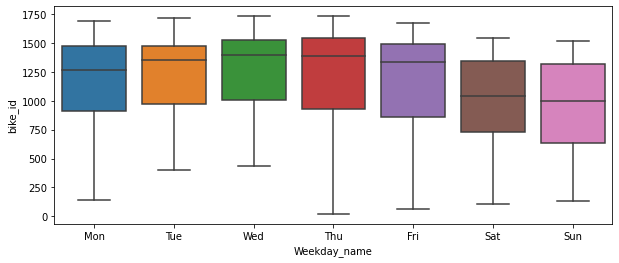

In [22]:
fig,ax = plt.subplots(figsize=(10,4)) 

sns.boxplot(x=boston_tempered_weekday.index.get_level_values(1), y=boston_tempered_weekday["bike_id"],ax=ax)
plt.show()

In [23]:
boston_tempered_hour = boston_2018_data_clean.groupby(["date","hour"])["bike_id"].nunique()
boston_tempered_hour= pd.DataFrame(boston_tempered_hour)

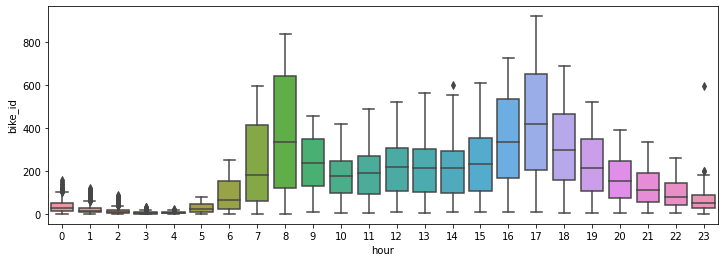

In [24]:
fig,ax = plt.subplots(figsize=(12,4)) 

sns.boxplot(x=boston_tempered_hour.index.get_level_values(1), y=boston_tempered_hour["bike_id"],ax=ax)
plt.show()

In [25]:
month_dict = {1:"Jan",2:"Feb",3:"Mar",4:"Apr",5:"May",6:"Jun",7:"Jul",8:"Aug",9:"Sep",10:"Oct",11:"Nov",12:"Dec"}

In [26]:
boston_2018_data_clean["month_name"] = boston_2018_data_clean["month"].apply(lambda x: month_dict[x])

In [27]:
boston_tempered_month = boston_2018_data_clean.groupby(["date","month_name"])["bike_id"].nunique()
boston_tempered_month= pd.DataFrame(boston_tempered_month)

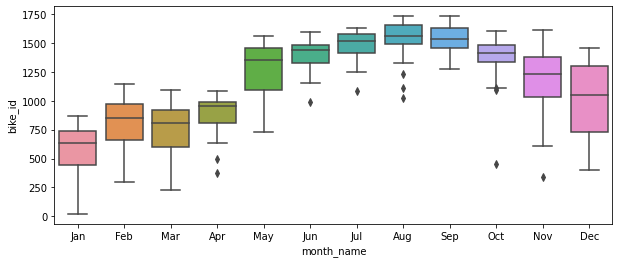

In [28]:
fig,ax = plt.subplots(figsize=(10,4)) 

sns.boxplot(x=boston_tempered_month.index.get_level_values(1), y=boston_tempered_month["bike_id"],ax=ax)
plt.show()

In [29]:
Bike_anzahl=boston_2018_data_clean.index

In [30]:
boston_2018_data_clean["Bike_Anzahl"]= Bike_anzahl

In [31]:
boston_2018_data_clean

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,date,weekday,hour,month,Weekday_name,month_name,Bike_Anzahl
0,2018-01-01 00:16:33,2018-01-01 00:23:01,178,107,MIT Pacific St at Purrington St,Ames St at Main St,643,Subscriber,2018-01-01,0,0,1,Mon,Jan,0
1,2018-01-01 00:42:00,2018-01-01 00:46:25,78,225,Union Square - Somerville,Cambridge Dept. of Public Works -147 Hampshire...,1581,Subscriber,2018-01-01,0,0,1,Mon,Jan,1
2,2018-01-01 00:42:44,2018-01-01 01:02:11,16,76,Back Bay T Stop - Dartmouth St at Stuart St,Central Sq Post Office / Cambridge City Hall a...,173,Subscriber,2018-01-01,0,0,1,Mon,Jan,2
3,2018-01-01 00:56:50,2018-01-01 01:11:06,69,177,Coolidge Corner - Beacon St @ Centre St,University Park,1772,Subscriber,2018-01-01,0,0,1,Mon,Jan,3
4,2018-01-01 01:07:54,2018-01-01 01:16:02,4,46,Tremont St at E Berkeley St,Christian Science Plaza - Massachusetts Ave at...,1183,Subscriber,2018-01-01,0,1,1,Mon,Jan,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1767801,2018-12-31 23:48:46,2018-12-31 23:56:55,19,179,Park Dr at Buswell St,MIT Vassar St,4440,Subscriber,2018-12-31,0,23,12,Mon,Dec,1767801
1767802,2018-12-31 23:48:58,2019-01-01 03:13:49,40,40,Lewis Wharf at Atlantic Ave,Lewis Wharf at Atlantic Ave,2117,Subscriber,2018-12-31,0,23,12,Mon,Dec,1767802
1767803,2018-12-31 23:51:19,2019-01-01 00:17:15,68,68,Central Square at Mass Ave / Essex St,Central Square at Mass Ave / Essex St,3725,Subscriber,2018-12-31,0,23,12,Mon,Dec,1767803
1767804,2018-12-31 23:54:16,2018-12-31 23:57:17,352,36,Ring Rd,Copley Square - Dartmouth St at Boylston St,3605,Customer,2018-12-31,0,23,12,Mon,Dec,1767804


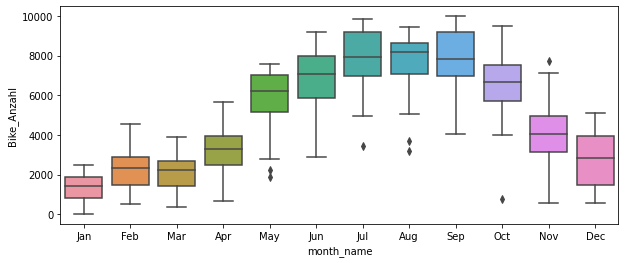

In [32]:
boston_tempered_month = boston_2018_data_clean.groupby(["date","month_name"])["Bike_Anzahl"].nunique()
boston_tempered_month= pd.DataFrame(boston_tempered_month)
fig,ax = plt.subplots(figsize=(10,4)) 

sns.boxplot(x=boston_tempered_month.index.get_level_values(1), y=boston_tempered_month["Bike_Anzahl"],ax=ax)
plt.show()

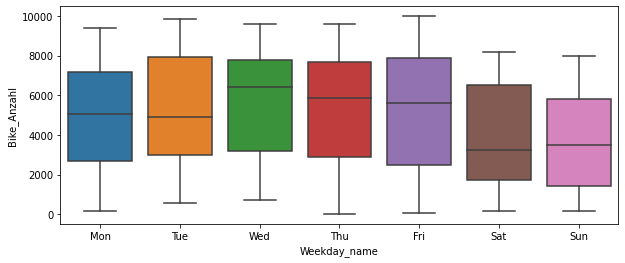

In [33]:

boston_tempered_weekday = boston_2018_data_clean.groupby(["date","Weekday_name"])["Bike_Anzahl"].nunique()
boston_tempered_weekday= pd.DataFrame(boston_tempered_weekday)

fig,ax = plt.subplots(figsize=(10,4)) 

sns.boxplot(x=boston_tempered_weekday.index.get_level_values(1), y=boston_tempered_weekday["Bike_Anzahl"],ax=ax)
plt.show()

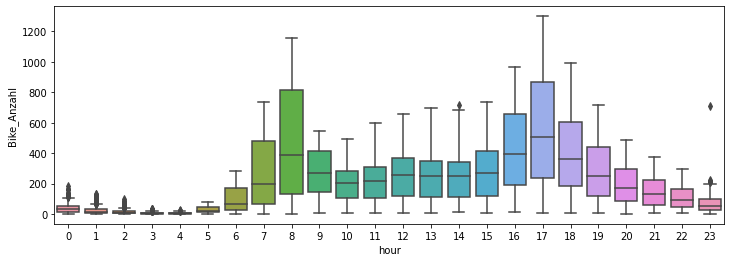

In [34]:
boston_tempered_hour = boston_2018_data_clean.groupby(["date","hour"])["Bike_Anzahl"].nunique()
boston_tempered_hour= pd.DataFrame(boston_tempered_hour)
fig,ax = plt.subplots(figsize=(12,4)) 

sns.boxplot(x=boston_tempered_hour.index.get_level_values(1), y=boston_tempered_hour["Bike_Anzahl"],ax=ax)
plt.show()

In [35]:
boston_2018_data_clean
#boston_2018_data_clean = ('start_station_id', axis=1)
#del boston_2018_data_clean ['start_station_id']

#Datensätze löschen

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,date,weekday,hour,month,Weekday_name,month_name,Bike_Anzahl
0,2018-01-01 00:16:33,2018-01-01 00:23:01,178,107,MIT Pacific St at Purrington St,Ames St at Main St,643,Subscriber,2018-01-01,0,0,1,Mon,Jan,0
1,2018-01-01 00:42:00,2018-01-01 00:46:25,78,225,Union Square - Somerville,Cambridge Dept. of Public Works -147 Hampshire...,1581,Subscriber,2018-01-01,0,0,1,Mon,Jan,1
2,2018-01-01 00:42:44,2018-01-01 01:02:11,16,76,Back Bay T Stop - Dartmouth St at Stuart St,Central Sq Post Office / Cambridge City Hall a...,173,Subscriber,2018-01-01,0,0,1,Mon,Jan,2
3,2018-01-01 00:56:50,2018-01-01 01:11:06,69,177,Coolidge Corner - Beacon St @ Centre St,University Park,1772,Subscriber,2018-01-01,0,0,1,Mon,Jan,3
4,2018-01-01 01:07:54,2018-01-01 01:16:02,4,46,Tremont St at E Berkeley St,Christian Science Plaza - Massachusetts Ave at...,1183,Subscriber,2018-01-01,0,1,1,Mon,Jan,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1767801,2018-12-31 23:48:46,2018-12-31 23:56:55,19,179,Park Dr at Buswell St,MIT Vassar St,4440,Subscriber,2018-12-31,0,23,12,Mon,Dec,1767801
1767802,2018-12-31 23:48:58,2019-01-01 03:13:49,40,40,Lewis Wharf at Atlantic Ave,Lewis Wharf at Atlantic Ave,2117,Subscriber,2018-12-31,0,23,12,Mon,Dec,1767802
1767803,2018-12-31 23:51:19,2019-01-01 00:17:15,68,68,Central Square at Mass Ave / Essex St,Central Square at Mass Ave / Essex St,3725,Subscriber,2018-12-31,0,23,12,Mon,Dec,1767803
1767804,2018-12-31 23:54:16,2018-12-31 23:57:17,352,36,Ring Rd,Copley Square - Dartmouth St at Boylston St,3605,Customer,2018-12-31,0,23,12,Mon,Dec,1767804


In [36]:
#boston_2018_data_clean.drop = ('start_station_name' , 'end_station_name')
#del boston_2018_data_clean ['start_station_name	end_station_name']
#boston_2018_data_clean.groupby(['month_name']=="Jan").count()
#print()
Connected_downwards_energy = boston_2018_data_clean[boston_2018_data_clean["month_name"]=="Jul"].groupby("month_name").sum()
#Connected_downwards_energy = boston_2018_data_clean.groupby(['month_name']).sum()

#freq = boston_2018_data_clean.groupby(['month_name']).sum('Jan')
#print(freq)
Connected_downwards_energy

#Versuche um die Tabelle nach ANzahl der Fahrräder zu filtern

,start_station_id,end_station_id,bike_id,weekday,hour,month,Bike_Anzahl
month_name,,,,,,,
Jul,21674179,21647720,530344658,674911,3411394,1700412,187193377302


In [37]:
month_dict2 = {1:"1",2:"1",3:"1",4:"1",5:"1",6:"1",7:"1",8:"1",9:"1",10:"1",11:"1",12:"1"}

In [38]:
boston_2018_data_clean["Index"] = boston_2018_data_clean["month"].apply(lambda x: month_dict2[x])

In [39]:
boston_2018_data_clean

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,date,weekday,hour,month,Weekday_name,month_name,Bike_Anzahl,Index
0,2018-01-01 00:16:33,2018-01-01 00:23:01,178,107,MIT Pacific St at Purrington St,Ames St at Main St,643,Subscriber,2018-01-01,0,0,1,Mon,Jan,0,1
1,2018-01-01 00:42:00,2018-01-01 00:46:25,78,225,Union Square - Somerville,Cambridge Dept. of Public Works -147 Hampshire...,1581,Subscriber,2018-01-01,0,0,1,Mon,Jan,1,1
2,2018-01-01 00:42:44,2018-01-01 01:02:11,16,76,Back Bay T Stop - Dartmouth St at Stuart St,Central Sq Post Office / Cambridge City Hall a...,173,Subscriber,2018-01-01,0,0,1,Mon,Jan,2,1
3,2018-01-01 00:56:50,2018-01-01 01:11:06,69,177,Coolidge Corner - Beacon St @ Centre St,University Park,1772,Subscriber,2018-01-01,0,0,1,Mon,Jan,3,1
4,2018-01-01 01:07:54,2018-01-01 01:16:02,4,46,Tremont St at E Berkeley St,Christian Science Plaza - Massachusetts Ave at...,1183,Subscriber,2018-01-01,0,1,1,Mon,Jan,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1767801,2018-12-31 23:48:46,2018-12-31 23:56:55,19,179,Park Dr at Buswell St,MIT Vassar St,4440,Subscriber,2018-12-31,0,23,12,Mon,Dec,1767801,1
1767802,2018-12-31 23:48:58,2019-01-01 03:13:49,40,40,Lewis Wharf at Atlantic Ave,Lewis Wharf at Atlantic Ave,2117,Subscriber,2018-12-31,0,23,12,Mon,Dec,1767802,1
1767803,2018-12-31 23:51:19,2019-01-01 00:17:15,68,68,Central Square at Mass Ave / Essex St,Central Square at Mass Ave / Essex St,3725,Subscriber,2018-12-31,0,23,12,Mon,Dec,1767803,1
1767804,2018-12-31 23:54:16,2018-12-31 23:57:17,352,36,Ring Rd,Copley Square - Dartmouth St at Boylston St,3605,Customer,2018-12-31,0,23,12,Mon,Dec,1767804,1


In [40]:
Jan = boston_2018_data_clean[boston_2018_data_clean["month"]==1].groupby("Index").count()

In [41]:
Feb = boston_2018_data_clean[boston_2018_data_clean["month"]==2].groupby("Index").count()

In [42]:
Mar = boston_2018_data_clean[boston_2018_data_clean["month"]==3].groupby("Index").count()

In [43]:
Apr = boston_2018_data_clean[boston_2018_data_clean["month"]==4].groupby("Index").count()

In [44]:
May = boston_2018_data_clean[boston_2018_data_clean["month"]==5].groupby("Index").count()

In [45]:
Jun = boston_2018_data_clean[boston_2018_data_clean["month"]==6].groupby("Index").count()

In [46]:
Jul = boston_2018_data_clean[boston_2018_data_clean["month"]==7].groupby("Index").count()

In [47]:
Aug = boston_2018_data_clean[boston_2018_data_clean["month"]==8].groupby("Index").count()

In [48]:
Sep = boston_2018_data_clean[boston_2018_data_clean["month"]==9].groupby("Index").count()

In [49]:
Oct = boston_2018_data_clean[boston_2018_data_clean["month"]==10].groupby("Index").count()

In [50]:
Nov = boston_2018_data_clean[boston_2018_data_clean["month"]==11].groupby("Index").count()

In [51]:
Dec = boston_2018_data_clean[boston_2018_data_clean["month"]==12].groupby("Index").count()

In [62]:
Data = {"Jan": Jan['month'],
      "Feb": Feb['month'],
       "Mar": Mar['month'],
        "Apr": Apr['month'],
        "May": May['month'],
        "Jun": Jun['month'],
        "Jul": Jul['month'],
        "Aug": Aug['month'],
        "sep": Sep['month'],
        "Oct": Oct['month'],
        "Nov": Nov['month'],
        "Dec": Dec['month']
       }

Year = pd.DataFrame(Data)
print(Year)

         Jan    Feb    Mar    Apr     May     Jun     Jul     Aug     sep  \
Index                                                                       
1      40932  62817  62985  98194  178865  205359  242916  236076  236182   

          Oct     Nov    Dec  
Index                         
1      200100  121419  81961  


In [60]:
# from IPython.display import HTML, display
# import tabulate
# Year = ["Jan",Jan['month'],
#        "Feb",Feb['month'],
#         "Mar",Mar['month'],
#         "Apr",Apr['month'],
#         "May",May['month'],
#         "Jun",Jun['month'],
#         "Jul",Jul['month'],
#         "Aug",Aug['month'],
#         "sep",Sep['month'],
#         "Oct",Oct['month'],
#         "Nov",Nov['month'],
#         "Dec",Dec['month']]
            
#     display(HTML(tabulate.tabulate(Year, tablefmt = 'month_name')))

Anzahl benutzter Fahrräder pro Monat

In [ ]:
boston_2018_data_clean

In [ ]:
month_name = pd.DataFrame(Data)


boston_2018_data_clean.merge(right = 'month_name' ,left_index=True, right_on = True)
#zusammenführen von Tabellen?

In [ ]:
boston_tempered_month = boston_2018_data_clean.groupby(["date","month_name"])["Bike_Anzahl"].apply(pd.DataFrame.Data)
boston_tempered_month= pd.DataFrame(boston_tempered_month,Year)
fig,ax = plt.subplots(figsize=(10,4)) 

sns.boxplot(x=boston_tempered_month.index.get_level_values(1), y=boston_tempered_month["Bike_Anzahl"],ax=ax)
plt.show()
#Versucht auszugeben, jedoch nicht geklappt